<a href="https://colab.research.google.com/github/MilkShaikh3/Predict_Regression/blob/master/Predict_Regression_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320%; while in Europe, it only accounts for up to 90% of the manufacturing cost.

Economies are better when logistics is efficient and affordable.

Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa.                                                                   

Sendy is hosting a challenge to predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination.

The solution will help Sendy enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

The purpose of this notebook is to build a model that predicts an accurate delivery time, from picking up a package to arriving at the final destination. An accurate arrival time prediction will help Sendy to improve their logistics and communicate an accurate time to their customers.

## Outline

In order to meet this objective, the notebook will cover the following sections:



*   Data Preprocessing applied to both the train and test datasets

*   The building of various models 

*   The selection of the best model







## The dataset 

The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. 


*  **Order No** – Unique number identifying the order
*  **User Id** – Unique number identifying the customer on a platform
*  **Vehicle Type** – For this challenge limited to bikes, however in practice,    Sendy service extends to trucks and vans
*  **Platform Type** – Platform used to place the order, there are 4 types
*   **Personal or Business** – Customer type
*   **Placement - Day of Month** i.e 1-31
*   **Placement - Weekday (Monday = 1)**
*   **Placement - Time** - Time of day the order was placed
*   **Confirmation - Day of Month** i.e 1-31
*   **Confirmation - Weekday (Monday = 1)**
*   **Confirmation - Time** - time of day the order was confirmed by a rider
*   **Arrival at Pickup - Day of Month** i.e 1-31
*   **Arrival at Pickup - Weekday (Monday = 1)**
*   **Arrival at Pickup - Time** - Time of day the rider arrived at the     location to pick up the order - as marked by the rider through the Sendy application

*   **Pickup - Day of Month** i.e 1-31
*   **Pickup - Weekday (Monday = 1)**
*   **Pickup - Time** - Time of day the rider picked up the order - as marked by the rider through the Sendy application
*   **Arrival at Delivery - Day of Month** i.e 1-31 **(NOT IN TEST SET)**
*   **Arrival at Delivery - Weekday (Monday = 1)** **(NOT IN TEST SET)**
*   **Arrival at Delivery - Time** - Time of day the rider arrived at the destination to deliver the order - as marked by the rider through the Sendy application **(NOT IN TEST SET)**
*   **Distance covered (KM)** - The distance from Pickup to Destination
*   **Temperature** -Temperature at the time of order placement in Degrees Celsius (measured every three hours)
*   **Precipitation in Millimeters** - Precipitation at the time of order placement (measured every three hours)
*   **Pickup Latitude and Longitude** - Latitude and longitude of pick up location
*   **Destination Latitude and Longitude** - Latitude and longitude of delivery location
*   **Rider ID** - ID of the Rider who accepted the order
*   **Time from Pickup to Arrival** - Time in seconds between ‘Pickup’ and ‘Arrival at Destination’ - calculated from the columns for the purpose of facilitating the task
*  **No of Orders** – Number of Orders the rider has delivered
*  **Age** – Number of days since the rider delivered the first order
*  **Average Rating** – Average rating of the rider
*  **No of Ratings** - Number of ratings the rider has received. Rating an order is optional for the customer.































# **Data Preprocessing**

## Train Data

### Importing the libraries and the dataset

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
dataset1 = pd.read_csv('https://raw.githubusercontent.com/MilkShaikh3/Predict_Regression/master/Train.csv')
dataset2 = pd.read_csv('https://raw.githubusercontent.com/MilkShaikh3/Predict_Regression/master/Riders.csv')

The 2 datasets are now merged in order to have all the information contained in one DataFrame. 

In [0]:
train = pd.merge(dataset1, dataset2, how='left', on='Rider Id') 

In [0]:
train

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,1270,367,14.4,131
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,1023,242,12.5,114
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,314,473,13.8,29
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,2451,1821,14.0,1101


After inspecting the data, it can be verified that the merge was successful. 

Some of the columns have white spaces, brackets and dashes that should be replaced with an underscore (in order to avoid using the column names as variable names later on).

In [0]:
train.columns = [col.replace(" - "," ") for col in train.columns]
train.columns = [col.replace(" ","_") for col in train.columns]
train.columns = [col.replace("_(Mo_=_1)","") for col in train.columns]
train.columns = [col.replace("(KM)","KM") for col in train.columns]
train.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday,...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


### Taking care of missing data

Firstly, the data types and number of entries of each column are inspected.

In [0]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Order_No                             21201 non-null  object 
 1   User_Id                              21201 non-null  object 
 2   Vehicle_Type                         21201 non-null  object 
 3   Platform_Type                        21201 non-null  int64  
 4   Personal_or_Business                 21201 non-null  object 
 5   Placement_Day_of_Month               21201 non-null  int64  
 6   Placement_Weekday                    21201 non-null  int64  
 7   Placement_Time                       21201 non-null  object 
 8   Confirmation_Day_of_Month            21201 non-null  int64  
 9   Confirmation_Weekday                 21201 non-null  int64  
 10  Confirmation_Time                    21201 non-null  object 
 11  Arrival_at_Pickup_Day_of_Mon

`train.info()` specifically outputs the number of non-null entries in each column. As such, it can be assured that the data has missing values if columns have a varying number of non-null entries.

From this, it is observed that Temperature and Precipitation have some missing values that needs to be taken care of.

The `SimpleImputer` module from the `sklearn.impute` library will not be used to impute the missing values. A more intuitive approach is followed. 

A function `imputer(input_df, column)` is built to impute the missing values.

In [0]:
def imputer(input_df, column):

  a = input_df.loc[pd.isna(input_df[column]), :].index # Obtaining the index of null values
  x = input_df[[column, 'Placement_Day_of_Month']]   
  y = x.groupby('Placement_Day_of_Month').mean()     # Aggregating values according to the day of the month

  for i in a:
    input_df.at[i, column] = round(y.loc[input_df.loc[i]['Placement_Day_of_Month']], 1)

  return input_df

The function takes in the DataFrame and the column(string) to be imputed as input, and returns the DataFrame with imputed values for the column. 

The average temperature and precipitation for each day of the month is calculated, and null values are imputed according to the average value on that day. 

In [0]:
imputer(train, 'Temperature')

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday,...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,1270,367,14.4,131
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,1023,242,12.5,114
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,314,473,13.8,29
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,2451,1821,14.0,1101


In [0]:
imputer(train, 'Precipitation_in_millimeters')

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday,...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,1270,367,14.4,131
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,1023,242,12.5,114
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,314,473,13.8,29
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,2451,1821,14.0,1101


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Order_No                             21201 non-null  object 
 1   User_Id                              21201 non-null  object 
 2   Vehicle_Type                         21201 non-null  object 
 3   Platform_Type                        21201 non-null  int64  
 4   Personal_or_Business                 21201 non-null  object 
 5   Placement_Day_of_Month               21201 non-null  int64  
 6   Placement_Weekday                    21201 non-null  int64  
 7   Placement_Time                       21201 non-null  object 
 8   Confirmation_Day_of_Month            21201 non-null  int64  
 9   Confirmation_Weekday                 21201 non-null  int64  
 10  Confirmation_Time                    21201 non-null  object 
 11  Arrival_at_Pickup_Day_of_Mon

It can be seen that the temperature values have been successfully imputed; however the precipitation still has null values. An investigation is now conducted to find out why is this the case. 

In [0]:
train[train['Precipitation_in_millimeters'].isnull()]

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday,...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
45,Order_No_13052,User_Id_250,Bike,2,Personal,16,4,11:19:46 AM,16,4,...,-1.264290,36.800214,-1.269534,36.806970,Rider_Id_650,628,4375,2362,14.4,1152
68,Order_No_28095,User_Id_633,Bike,3,Business,16,3,2:29:26 PM,16,3,...,-1.307787,36.844321,-1.300406,36.829741,Rider_Id_188,490,3837,2018,14.1,786
112,Order_No_23454,User_Id_2587,Bike,3,Business,16,2,2:25:06 PM,16,2,...,-1.276574,36.851365,-1.288780,36.816831,Rider_Id_438,1052,557,239,14.6,55
155,Order_No_10054,User_Id_1927,Bike,3,Business,16,4,4:22:55 PM,16,4,...,-1.347207,36.769264,-1.310634,36.680977,Rider_Id_821,2412,94,155,14.6,15
196,Order_No_834,User_Id_788,Bike,3,Business,16,3,9:00:30 AM,16,3,...,-1.225322,36.808550,-1.291768,36.829721,Rider_Id_101,2761,1299,986,13.1,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21086,Order_No_2209,User_Id_2412,Bike,3,Business,16,4,11:39:53 AM,16,4,...,-1.281059,36.883829,-1.229720,36.881951,Rider_Id_249,1325,191,713,14.0,29
21097,Order_No_27731,User_Id_1904,Bike,1,Personal,16,1,1:28:18 PM,16,1,...,-1.325747,36.859207,-1.290405,36.805515,Rider_Id_88,1863,1450,872,13.8,329
21105,Order_No_27247,User_Id_302,Bike,3,Business,16,6,7:24:39 PM,16,6,...,-1.264960,36.798178,-1.311233,36.814632,Rider_Id_314,27,201,306,12.6,21
21106,Order_No_19762,User_Id_2174,Bike,3,Business,16,4,3:27:34 PM,16,4,...,-1.248278,36.884092,-1.297924,36.790242,Rider_Id_946,1929,2336,2184,13.7,524


After investigating, it has been found that all the null values fall on the 16th day of the month. This gives cause to believe that it may not have rained on that day at all. Hence the precipitation on that day will be imputed with the value zero. 

In [0]:
train['Precipitation_in_millimeters'].fillna(0, inplace=True)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Order_No                             21201 non-null  object 
 1   User_Id                              21201 non-null  object 
 2   Vehicle_Type                         21201 non-null  object 
 3   Platform_Type                        21201 non-null  int64  
 4   Personal_or_Business                 21201 non-null  object 
 5   Placement_Day_of_Month               21201 non-null  int64  
 6   Placement_Weekday                    21201 non-null  int64  
 7   Placement_Time                       21201 non-null  object 
 8   Confirmation_Day_of_Month            21201 non-null  int64  
 9   Confirmation_Weekday                 21201 non-null  int64  
 10  Confirmation_Time                    21201 non-null  object 
 11  Arrival_at_Pickup_Day_of_Mon

### Visualising the data

We take a look at plots in the data to see whether there are any relationships

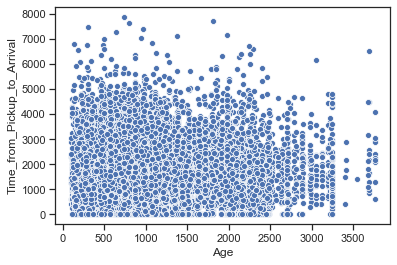

In [0]:
sns.scatterplot(x="Age", y="Time_from_Pickup_to_Arrival", data=train)
plt.show()

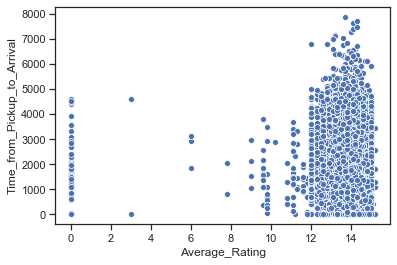

In [0]:
sns.scatterplot(x="Average_Rating", y="Time_from_Pickup_to_Arrival", data=train)
plt.show()

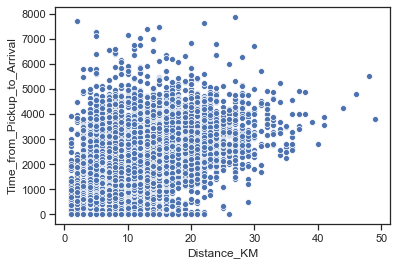

In [0]:
sns.scatterplot(x="Distance_KM", y="Time_from_Pickup_to_Arrival", data=train)
plt.show()

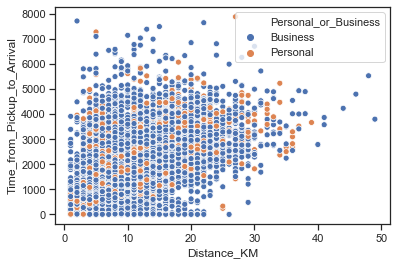

In [0]:
sns.scatterplot(x="Distance_KM", y="Time_from_Pickup_to_Arrival" ,hue='Personal_or_Business', data=train)
plt.show()

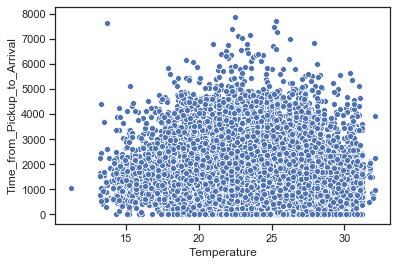

In [0]:
sns.scatterplot(x="Temperature", y="Time_from_Pickup_to_Arrival" , data=train)
plt.show()


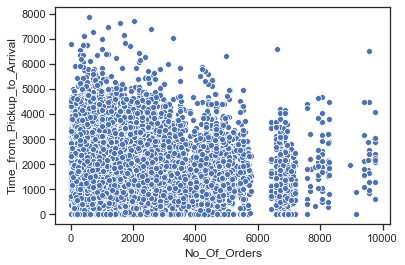

In [0]:
sns.scatterplot(x="No_Of_Orders", y="Time_from_Pickup_to_Arrival", data=train)
plt.show()

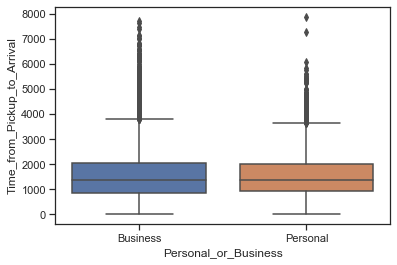

In [0]:
sns.boxplot(x='Personal_or_Business', y="Time_from_Pickup_to_Arrival", data=train)
plt.show()

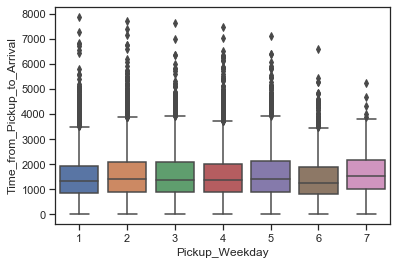

In [0]:
sns.boxplot(x='Pickup_Weekday', y="Time_from_Pickup_to_Arrival", data=train)
plt.show()

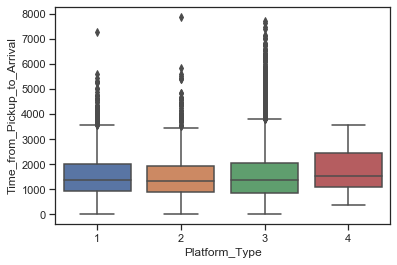

In [0]:
sns.boxplot(x='Platform_Type', y="Time_from_Pickup_to_Arrival", data=train)
plt.show()

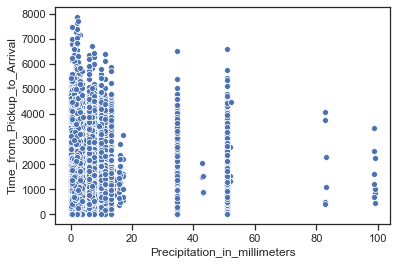

In [0]:
sns.scatterplot(x="Precipitation_in_millimeters", y="Time_from_Pickup_to_Arrival", data=train)
plt.show()

### Encoding our data

Now let's look at a table showcasing the summary statistics of the data

In [0]:
train.describe()

,Platform_Type,Placement_Day_of_Month,Placement_Weekday,Confirmation_Day_of_Month,Confirmation_Weekday,Arrival_at_Pickup_Day_of_Month,Arrival_at_Pickup_Weekday,Pickup_Day_of_Month,Pickup_Weekday,Arrival_at_Destination_Day_of_Month,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,...,6.245135,-1.281470,36.811264,-1.282581,36.811220,1556.920947,1692.423706,984.742842,13.882520,341.067119
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,...,11.180166,0.030507,0.037473,0.034824,0.044721,987.270788,1574.308302,646.652835,0.916071,402.867746
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,-1.438302,36.653621,-1.430298,36.606594,1.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,1.000000,-1.300921,36.784605,-1.301201,36.785661,882.000000,557.000000,495.000000,13.600000,61.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,2.100000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,1212.000000,872.000000,14.000000,161.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,...,5.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,2311.000000,1236.000000,14.300000,495.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


As can be observed in the above table, little information is obtained from summary statistics of our numerical categorical data (such as `'Platform_Type'`) at the moment.

All input data for regression model building purposes needs to be numerical. Therefore text data (found in columns such as `'Pickup_Time'` and `'Personal_or_Business'`) has to be transformed into numbers before the machine learning model can be trained.

A function `convert_time(input_df, column_name)` is built to convert time to the part of day it falls in (like afternoon, evening, etc).  

In [0]:
def convert_time(input_df, column_name):

  input_df[column_name] = pd.to_datetime(input_df[column_name]).dt.hour #Convert time to the hour in a 24-hour day

  bins=[-1, 3, 7, 11, 15, 19, 23]
  labels=pd.Categorical(['Night', 'EarlyMorning', 'Morning', 'Afternoon', 'Evening', 'Night'])
  input_df[column_name] = pd.cut(x=input_df[column_name], bins=bins, labels=labels)
  
  return input_df

The function takes in a DataFrame and a column(string) as input, and returns a modified DataFrame. The times in the column inputted are first converted to the hour (24-hour clock), and then categorised accordingly. 

In [0]:
convert_time(train, 'Pickup_Time')
convert_time(train, 'Placement_Time')
convert_time(train, 'Confirmation_Time')
convert_time(train, 'Arrival_at_Pickup_Time')
convert_time(train, 'Arrival_at_Destination_Time')

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday,...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,Morning,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,Morning,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,Afternoon,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,Morning,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,Morning,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,Afternoon,20,3,...,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,1270,367,14.4,131
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,Morning,13,6,...,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,1023,242,12.5,114
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,Evening,7,4,...,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,314,473,13.8,29
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,Morning,4,3,...,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,2451,1821,14.0,1101


Time has now converted into categories according to the time of day. However, text data is to be converted into numerical data before it can be fed into the machine learning model.

To facilitate this transformation from textual-categorical data to numerical equivalents, we use dummy variable encoding. 

In [0]:
columns = ['Personal_or_Business', 'Platform_Type', 'Arrival_at_Pickup_Time', 
           'Confirmation_Time', 'Placement_Time', 'Pickup_Time']
           
train_dummies = pd.get_dummies(train, columns=columns, drop_first=True) 

# Again make sure that all the column names have underscores instead of whitespaces
train_dummies.columns = [col.replace(" ", "_") for col in train_dummies.columns]

In order to ensure that an underlying relationship between the categories are not assumed, we can call `pd.get_dummies` with the argument `drop_first=True` so that only n-1 columns for each variable with n categories are created. 

In [0]:
train_dummies.shape

(21201, 47)

Suddenly, we have many more variable columns given the dummy variable encoding. 


Acting on intuition, the remaining textual data can be removed. 

`Vehicle_Type`: Since the dataset contains data on bikes only, this column is unnecessary, and hence dropped.

`Rider_Id`: Each Rider_Id contains specific data relevant to that driver (such as ratings, number of deliveries, etc). This data is already contained in the dataset (over the various columns), and hence this column is dropped.

`User_Id`: (Same intuition as Rider_Id).

`Order_No`: Since this has to be preserved, but we can not include it inside our model, it is made to be the index. 

The four columns dealing with co-ordinates (i.e `Pickup_Lat`, `Pickup_Long`, `Destination_Lat` and `Destination_Long`) are not numerical data and essentially needs to be removed. Furthermore, the `Distance_KM` column suffices.

The columns `Arrival_at_Destination_Day_of_Month`,	`Arrival_at_Destination_Weekday` and `Arrival_at_Destination_Time` are to also be dropped since it is not included in our test dataset, and is also not required for modelling. 


In [0]:
train_dummies.drop('Vehicle_Type', axis=1, inplace=True)
train_dummies.drop('User_Id', axis=1, inplace=True)
train_dummies.drop('Rider_Id', axis=1, inplace=True)
train_dummies.drop('Pickup_Lat', axis=1, inplace=True)
train_dummies.drop('Pickup_Long', axis=1, inplace=True)
train_dummies.drop('Destination_Lat', axis=1, inplace=True)
train_dummies.drop('Destination_Long', axis=1, inplace=True)
train_dummies.drop('Arrival_at_Destination_Day_of_Month', axis=1, inplace=True)
train_dummies.drop('Arrival_at_Destination_Weekday', axis=1, inplace=True)
train_dummies.drop('Arrival_at_Destination_Time', axis=1, inplace=True)

In [0]:
train_dummies.set_index('Order_No', inplace=True)

In [0]:
train_dummies

,Placement_Day_of_Month,Placement_Weekday,Confirmation_Day_of_Month,Confirmation_Weekday,Arrival_at_Pickup_Day_of_Month,Arrival_at_Pickup_Weekday,Pickup_Day_of_Month,Pickup_Weekday,Distance_KM,Temperature,...,Confirmation_Time_Morning,Confirmation_Time_Night,Placement_Time_EarlyMorning,Placement_Time_Evening,Placement_Time_Morning,Placement_Time_Night,Pickup_Time_EarlyMorning,Pickup_Time_Evening,Pickup_Time_Morning,Pickup_Time_Night
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,9,5,9,5,9,5,4,20.4,...,1,0,0,0,1,0,0,0,1,0
Order_No_25375,12,5,12,5,12,5,12,5,16,26.4,...,1,0,0,0,1,0,0,0,1,0
Order_No_1899,30,2,30,2,30,2,30,2,3,23.0,...,0,0,0,0,0,0,0,0,0,0
Order_No_9336,15,5,15,5,15,5,15,5,9,19.2,...,1,0,0,0,1,0,0,0,1,0
Order_No_27883,13,1,13,1,13,1,13,1,9,15.4,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Order_No_8834,20,3,20,3,20,3,20,3,3,28.6,...,0,0,0,0,0,0,0,1,0,0
Order_No_22892,13,6,13,6,13,6,13,6,7,26.0,...,1,0,0,0,1,0,0,0,1,0
Order_No_2831,7,4,7,4,7,4,7,4,20,29.2,...,0,0,0,1,0,0,0,1,0,0


The final `train_dummies` DataFrame is obtained. 

### Correlations

In [0]:
train_dummies.shape

(21201, 36)

Using this dataframe, a model predicting `'Time_from_Pickup_to_Arrival'` as a function of 35 potential different independent variables can be built. 

Firstly, the columns are re-ordered so that our dependent variable is the last column of the dataframe. 
This makes a heatmap visualisation representing a correlation matrix of our data easier to interpret.

In [0]:
column_titles = [col for col in train_dummies.columns if col!= 'Time_from_Pickup_to_Arrival'] + ['Time_from_Pickup_to_Arrival']
train_dummies=train_dummies.reindex(columns=column_titles)

The correlation matrix is inspected:

In [0]:
train_dummies.corr()

,Placement_Day_of_Month,Placement_Weekday,Confirmation_Day_of_Month,Confirmation_Weekday,Arrival_at_Pickup_Day_of_Month,Arrival_at_Pickup_Weekday,Pickup_Day_of_Month,Pickup_Weekday,Distance_KM,Temperature,...,Confirmation_Time_Night,Placement_Time_EarlyMorning,Placement_Time_Evening,Placement_Time_Morning,Placement_Time_Night,Pickup_Time_EarlyMorning,Pickup_Time_Evening,Pickup_Time_Morning,Pickup_Time_Night,Time_from_Pickup_to_Arrival
Placement_Day_of_Month,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.013154,...,-0.005005,0.005861,0.005516,-0.010109,-0.003506,0.004525,0.003959,-0.008339,-0.006600,-0.014710
Placement_Weekday,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.033645,...,0.015499,0.002276,0.015926,0.020865,0.018805,-0.003131,0.003698,0.016432,0.023198,0.009693
Confirmation_Day_of_Month,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013155,...,-0.005006,0.005860,0.005510,-0.010122,-0.003507,0.004524,0.003952,-0.008351,-0.006601,-0.014701
Confirmation_Weekday,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.033654,...,0.015495,0.002268,0.015896,0.020792,0.018802,-0.003135,0.003657,0.016368,0.023193,0.009744
Arrival_at_Pickup_Day_of_Month,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013155,...,-0.005006,0.005860,0.005510,-0.010122,-0.003507,0.004524,0.003952,-0.008351,-0.006601,-0.014701
Arrival_at_Pickup_Weekday,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.033654,...,0.015495,0.002268,0.015896,0.020792,0.018802,-0.003135,0.003657,0.016368,0.023193,0.009744
Pickup_Day_of_Month,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013155,...,-0.005006,0.005860,0.005510,-0.010122,-0.003507,0.004524,0.003952,-0.008351,-0.006601,-0.014701
Pickup_Weekday,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.033654,...,0.015495,0.002268,0.015896,0.020792,0.018802,-0.003135,0.003657,0.016368,0.023193,0.009744
Distance_KM,-0.007585,0.003582,-0.007587,0.003574,-0.007587,0.003574,-0.007587,0.003574,1.000000,-0.001545,...,-0.016686,0.001038,-0.033298,0.032187,-0.016507,0.019500,-0.028530,0.020930,-0.017132,0.580608
Temperature,0.013154,0.033645,0.013155,0.033654,0.013155,0.033654,0.013155,0.033654,-0.001545,1.000000,...,-0.051171,-0.109156,0.021322,-0.337349,-0.050140,-0.060662,0.083620,-0.365483,-0.059482,0.006721


The correlation heatmap is inspected:

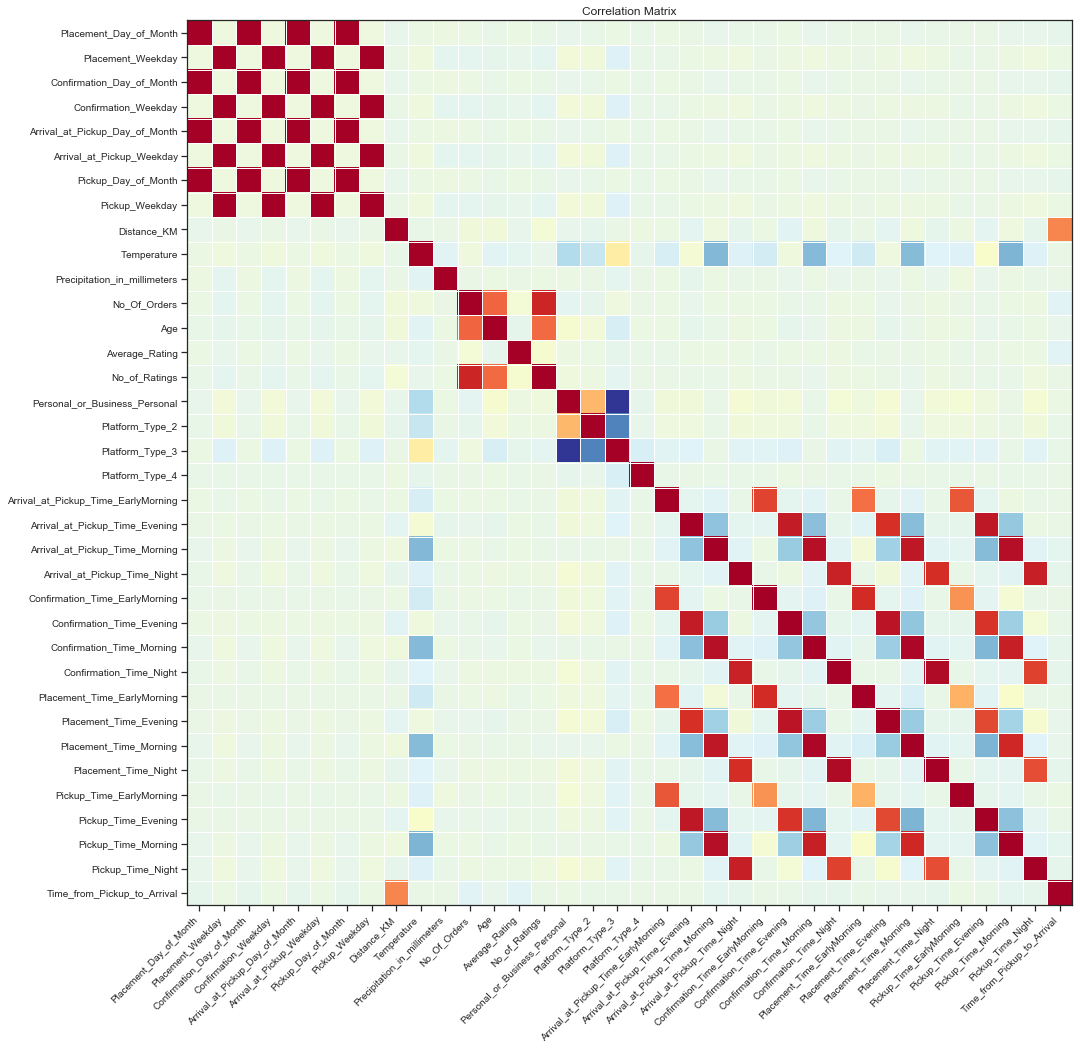

In [0]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(train_dummies.corr(), xnames = train_dummies.corr().columns, ax = ax);



It can be seen from the correlation heatmap that it is not the best idea to keep all of the variables.

If all of these variables are used, we're effectively working with superfluous or redundant information. 

Our model also exhibits the issue of multicollinearity.

This will likely be a problem when the model is built - an OLS summary will now be inspected. 

### Fitting the model using OLS

In [0]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dm = train_dummies.copy()

# The dependent variable:
y_name = 'Time_from_Pickup_to_Arrival'
# The independent variable:
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 Time_from_Pickup_to_Arrival ~ Placement_Day_of_Month + Placement_Weekday + Confirmation_Day_of_Month + Confirmation_Weekday + Arrival_at_Pickup_Day_of_Month + Arrival_at_Pickup_Weekday + Pickup_Day_of_Month + Pickup_Weekday + Distance_KM + Temperature + Precipitation_in_millimeters + No_Of_Orders + Age + Average_Rating + No_of_Ratings + Personal_or_Business_Personal + Platform_Type_2 + Platform_Type_3 + Platform_Type_4 + Arrival_at_Pickup_Time_EarlyMorning + Arrival_at_Pickup_Time_Evening + Arrival_at_Pickup_Time_Morning + Arrival_at_Pickup_Time_Night + Confirmation_Time_EarlyMorning + Confirmation_Time_Evening + Confirmation_Time_Morning + Confirmation_Time_Night + Placement_Time_EarlyMorning + Placement_Time_Evening + Placement_Time_Morning + Placement_Time_Night + Pickup_Time_EarlyMorning + Pickup_Time_Evening + Pickup_Time_Morning + Pickup_Time_Night


In [0]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                                 OLS Regression Results                                
Dep. Variable:     Time_from_Pickup_to_Arrival   R-squared:                       0.350
Model:                                     OLS   Adj. R-squared:                  0.349
Method:                          Least Squares   F-statistic:                     379.7
Date:                         Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                                 13:50:55   Log-Likelihood:            -1.7170e+05
No. Observations:                        21201   AIC:                         3.435e+05
Df Residuals:                            21170   BIC:                         3.437e+05
Df Model:                                   30                                         
Covariance Type:                     nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

In warning [2], there is mention of strong multicollinearity.

Let's make further selections on the variables now using their significance.

### Variable Selection by Correlation and Significance

There are 35 predictor variables to choose from, so a way of guiding us to choose the best ones to be our predictors is needed.       
One way is to observe the correlations between the `Time_from_Pickup_to_Arrival` and each variable in our DataFrame, and select those with the strongest correlations (both positive and negative).
                       
The significance of these features also need to be taken into consideration. 

In [0]:
# Calculate correlations between predictor variables and the response variable
corrs = train_dummies.corr()['Time_from_Pickup_to_Arrival'].sort_values(ascending=False)

The code creates a new DataFrame and stores the correlation coefficents and p-values in that DataFrame for reference.

Using Pearson regression from `SciPy`:

In [0]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Time_from_Pickup_to_Arrival']
for col in column_titles:
    p_val = round(pearsonr(train_dummies[col], train_dummies['Time_from_Pickup_to_Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted

,Correlation_Coefficient,P_Value
Distance_KM,0.580608,0.000000
No_Of_Orders,-0.041608,0.000000
Average_Rating,-0.042559,0.000000
Arrival_at_Pickup_Time_Morning,-0.023510,0.000618
Pickup_Time_Morning,-0.022279,0.001178
Pickup_Time_Night,-0.019086,0.005452
Confirmation_Time_Night,-0.018756,0.006313
Placement_Time_Night,-0.017283,0.011852
Arrival_at_Pickup_Time_Night,-0.015281,0.026083
Placement_Day_of_Month,-0.014710,0.032205


Now we've got a sorted list of the p-values and correlation coefficients for each of the features, when considered on their own.

If we were to use a logic test with a significance value of 10% (p-value < 0.1), we could infer the following features mentioned to be statistically significant:


*   Distance_KM
*   No_Of_Orders
*Average_Rating
*Personal_or_Business_Personal
*Pickup_Time (dummy)
*Arrival_at_Pickup_Time (dummy)








Only these variables that have a significant correlation with the dependent variable are kept. 

They are put into an independent variable DataFrame X.

In [0]:
# The dependent variable remains the same:
y_data = train_dummies[y_name]  # y_name = 'Time_from_Pickup_to_Arrival '

# Model building - Independent Variable (IV) DataFrame

X_names = ['Distance_KM', 'No_Of_Orders', 'Average_Rating', 
           'Personal_or_Business_Personal','Pickup_Time_EarlyMorning', 
           'Pickup_Time_Evening', 'Pickup_Time_Morning','Pickup_Time_Night', 
           'Arrival_at_Pickup_Time_EarlyMorning',
           'Arrival_at_Pickup_Time_Evening', 'Arrival_at_Pickup_Time_Morning', 
           'Arrival_at_Pickup_Time_Night']               

X_data = train_dummies[X_names]

However, it is to be inspected for predictor variable pairs which have a high correlation with each other in order to avoid autocorrelation.

In [0]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columns where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Distance_KM,No_Of_Orders,Average_Rating,Personal_or_Business_Personal,Pickup_Time_EarlyMorning,Pickup_Time_Evening,Pickup_Time_Morning,Pickup_Time_Night,Arrival_at_Pickup_Time_EarlyMorning,Arrival_at_Pickup_Time_Evening,Arrival_at_Pickup_Time_Morning,Arrival_at_Pickup_Time_Night
Distance_KM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_Of_Orders,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average_Rating,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal_or_Business_Personal,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pickup_Time_EarlyMorning,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pickup_Time_Evening,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.908355,NaN,NaN
Pickup_Time_Morning,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.941185,NaN
Pickup_Time_Night,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Arrival_at_Pickup_Time_EarlyMorning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Arrival_at_Pickup_Time_Evening,NaN,NaN,NaN,NaN,NaN,0.908355,NaN,NaN,NaN,1.000000,NaN,NaN


Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

In [0]:
# We create the correlation matrix again 
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.8)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Arrival_at_Pickup_Time_Evening,Arrival_at_Pickup_Time_Morning,Arrival_at_Pickup_Time_Night,Pickup_Time_Evening,Pickup_Time_Morning,Pickup_Time_Night
Pickup_Time_Evening,0.908355,-0.338383,-0.024632,1.000000,-0.320805,-0.027942
Pickup_Time_Morning,-0.293465,0.941185,-0.038816,-0.320805,1.000000,-0.044032
Pickup_Time_Night,0.013462,-0.046445,0.881542,-0.027942,-0.044032,1.000000
Arrival_at_Pickup_Time_Evening,1.000000,-0.309545,-0.022533,0.908355,-0.293465,0.013462
Arrival_at_Pickup_Time_Morning,-0.309545,1.000000,-0.040943,-0.338383,0.941185,-0.046445
Arrival_at_Pickup_Time_Night,-0.022533,-0.040943,1.000000,-0.024632,-0.038816,0.881542


It looks like `Arrival_at_Pickup_Time` and `Pickup_Time` are very highly correlated (unsurprising).

This was also visible looking back at the correlation coefficient heatmap and matrix from earlier.

Considering which predictor variable to drop, `Pickup_Time ` is slightly better correlated (and lower p-value) to the dependent variable `Time_from_Pickup_to_Arrival`.

Hence `Arrival_at_Pickup_Time` is dropped from the feature dataframe.

In [0]:
# Lets take a new subset of our potential independent variables
X_remove = ['Arrival_at_Pickup_Time_EarlyMorning',
           'Arrival_at_Pickup_Time_Evening', 'Arrival_at_Pickup_Time_Morning', 
           'Arrival_at_Pickup_Time_Night']
X_corr_names = [col for col in X_names if col not in X_remove]

Now it is seen what the resulting OLS fit summary says:

In [0]:
# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	Time_from_Pickup_to_Arrival ~ Distance_KM + No_Of_Orders + Average_Rating + Personal_or_Business_Personal + Pickup_Time_EarlyMorning + Pickup_Time_Evening + Pickup_Time_Morning + Pickup_Time_Night


In [0]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                                 OLS Regression Results                                
Dep. Variable:     Time_from_Pickup_to_Arrival   R-squared:                       0.344
Model:                                     OLS   Adj. R-squared:                  0.344
Method:                          Least Squares   F-statistic:                     1388.
Date:                         Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                                 13:51:04   Log-Likelihood:            -1.7180e+05
No. Observations:                        21201   AIC:                         3.436e+05
Df Residuals:                            21192   BIC:                         3.437e+05
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

### Getting X_train and y_train

In [0]:
y_train = train_dummies[y_name]
X_train = train_dummies[X_corr_names]

Our fully pre-processed train data is now obtained!

### Getting X_train_scaled (Feature Scaling)

Based on the means and standard deviations of different columns, we may want to consider whether to standardize our features or not.

In [0]:
X_train.describe()

,Distance_KM,No_Of_Orders,Average_Rating,Personal_or_Business_Personal,Pickup_Time_EarlyMorning,Pickup_Time_Evening,Pickup_Time_Morning,Pickup_Time_Night
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,9.506533,1692.423706,13.882520,0.180039,0.001604,0.169143,0.335786,0.003821
std,5.668963,1574.308302,0.916071,0.384229,0.040015,0.374887,0.472276,0.061694
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,557.000000,13.600000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,1212.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,2311.000000,14.300000,0.000000,0.000000,0.000000,1.000000,0.000000
max,49.000000,9756.000000,15.200000,1.000000,1.000000,1.000000,1.000000,1.000000


After observing the means and standard deviations of the features, it can be deduced that they might require standardization. 

However, the dummy variables do not require standardization (since they are binary variables). Hence only the first 3 columns are transformed.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardised = scaler.fit_transform(X_train.iloc[:, :3])

In [0]:
# Convert the scaled predictor values into a DataFrame
X_train_standardised = pd.DataFrame(X_train_standardised,columns=X_train.columns[:3], index=X_train.index)
X_train_standardised.head()

,Distance_KM,No_Of_Orders,Average_Rating
Order_No,,,
Order_No_4211,-0.971370,-0.035206,-0.090082
Order_No_25375,1.145469,-0.823507,-0.308411
Order_No_1899,-1.147774,-0.425228,-1.509220
Order_No_9336,-0.089354,-0.512252,0.674069
Order_No_27883,-0.089354,0.392929,0.237411


Taking a look at the transformed variables, it can be seen that standardizing the data has caused it to be centered around zero.



Furthermore, the variance within each transformed variable is now equal to one. 

In [0]:
X_train_standardised.describe().loc['std']

Distance_KM       1.000024
No_Of_Orders      1.000024
Average_Rating    1.000024
Name: std, dtype: float64

In [0]:
# The columns not transformed are now added to this DataFrame to obtain X_train_scaled
X_train_scaled = X_train_standardised.join(X_train.iloc[:,-5:], how='inner')
X_train_scaled.head()

,Distance_KM,No_Of_Orders,Average_Rating,Personal_or_Business_Personal,Pickup_Time_EarlyMorning,Pickup_Time_Evening,Pickup_Time_Morning,Pickup_Time_Night
Order_No,,,,,,,,
Order_No_4211,-0.971370,-0.035206,-0.090082,0,0,0,1,0
Order_No_25375,1.145469,-0.823507,-0.308411,1,0,0,1,0
Order_No_1899,-1.147774,-0.425228,-1.509220,0,0,0,0,0
Order_No_9336,-0.089354,-0.512252,0.674069,0,0,0,1,0
Order_No_27883,-0.089354,0.392929,0.237411,1,0,0,1,0


The final `X_train_scaled` is now obtained.

## Test Data

The test data has to be in the same format as the train data. Hence, the same iterative process used to clean the train data will be followed here. 

### Importing the libraries and the dataset

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
dataset3 = pd.read_csv('https://raw.githubusercontent.com/MilkShaikh3/Predict_Regression/master/Test.csv')

In [0]:
test = pd.merge(dataset3, dataset2, how='left', on='Rider Id') 

In [0]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


The 2 datasets are succesfully merged.

Column names with white spaces, brackets and dashes are replaced with an underscore.

In [0]:
test.columns = [col.replace(" - "," ") for col in test.columns]
test.columns = [col.replace(" ","_") for col in test.columns]
test.columns = [col.replace("_(Mo_=_1)","") for col in test.columns]
test.columns = [col.replace("(KM)","KM") for col in test.columns]
test.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


### Taking care of missing data

Firstly, the data types and number of entries of each column are inspected.

In [0]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Order_No                        7068 non-null   object 
 1   User_Id                         7068 non-null   object 
 2   Vehicle_Type                    7068 non-null   object 
 3   Platform_Type                   7068 non-null   int64  
 4   Personal_or_Business            7068 non-null   object 
 5   Placement_Day_of_Month          7068 non-null   int64  
 6   Placement_Weekday               7068 non-null   int64  
 7   Placement_Time                  7068 non-null   object 
 8   Confirmation_Day_of_Month       7068 non-null   int64  
 9   Confirmation_Weekday            7068 non-null   int64  
 10  Confirmation_Time               7068 non-null   object 
 11  Arrival_at_Pickup_Day_of_Month  7068 non-null   int64  
 12  Arrival_at_Pickup_Weekday       70

From this, it is observed that Temperature and Precipitation have some missing values that needs to be taken care of.

The imputer(input_df, column) function built earlier will be used to impute the missing values.

In [0]:
imputer(test, 'Temperature')

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,Order_No_3612,User_Id_2587,Bike,3,Business,7,1,10:35:49 AM,7,1,...,NaN,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_362,1018,504,13.1,87
7064,Order_No_7657,User_Id_3547,Bike,3,Business,10,3,2:59:42 PM,10,3,...,NaN,-1.276141,36.771084,-1.316098,36.913164,Rider_Id_669,6728,2702,13.9,2027
7065,Order_No_1969,User_Id_136,Bike,3,Business,5,3,2:45:12 PM,5,3,...,NaN,-1.301446,36.766138,-1.264960,36.798178,Rider_Id_379,1601,1337,13.7,441
7066,Order_No_10591,User_Id_1979,Bike,3,Personal,29,2,3:18:26 PM,29,2,...,NaN,-1.248404,36.678276,-1.272027,36.817411,Rider_Id_474,225,878,14.1,66


In [0]:
imputer(test, 'Precipitation_in_millimeters')


,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,1.7,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,6.9,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,1.7,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,6.9,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,9.7,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,Order_No_3612,User_Id_2587,Bike,3,Business,7,1,10:35:49 AM,7,1,...,1.2,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_362,1018,504,13.1,87
7064,Order_No_7657,User_Id_3547,Bike,3,Business,10,3,2:59:42 PM,10,3,...,1.6,-1.276141,36.771084,-1.316098,36.913164,Rider_Id_669,6728,2702,13.9,2027
7065,Order_No_1969,User_Id_136,Bike,3,Business,5,3,2:45:12 PM,5,3,...,2.5,-1.301446,36.766138,-1.264960,36.798178,Rider_Id_379,1601,1337,13.7,441
7066,Order_No_10591,User_Id_1979,Bike,3,Personal,29,2,3:18:26 PM,29,2,...,4.0,-1.248404,36.678276,-1.272027,36.817411,Rider_Id_474,225,878,14.1,66


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Order_No                        7068 non-null   object 
 1   User_Id                         7068 non-null   object 
 2   Vehicle_Type                    7068 non-null   object 
 3   Platform_Type                   7068 non-null   int64  
 4   Personal_or_Business            7068 non-null   object 
 5   Placement_Day_of_Month          7068 non-null   int64  
 6   Placement_Weekday               7068 non-null   int64  
 7   Placement_Time                  7068 non-null   object 
 8   Confirmation_Day_of_Month       7068 non-null   int64  
 9   Confirmation_Weekday            7068 non-null   int64  
 10  Confirmation_Time               7068 non-null   object 
 11  Arrival_at_Pickup_Day_of_Month  7068 non-null   int64  
 12  Arrival_at_Pickup_Weekday       70

It can be seen that the temperature values have been successfully imputed; however the precipitation still has null values. An investigation is now conducted to find out why is this the case. 

In [0]:
test[test['Precipitation_in_millimeters'].isnull()]

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
7,Order_No_18436,User_Id_3764,Bike,3,Business,28,4,8:51:13 AM,28,4,...,NaN,-1.273539,36.833775,-1.297299,36.789446,Rider_Id_62,2072,1151,13.5,571
8,Order_No_2288,User_Id_2866,Bike,3,Business,28,4,8:58:21 AM,28,4,...,NaN,-1.255189,36.782203,-1.285770,36.759172,Rider_Id_177,526,286,13.6,70
15,Order_No_14832,User_Id_3721,Bike,1,Personal,14,1,2:47:50 PM,14,1,...,NaN,-1.304382,36.784059,-1.285264,36.822413,Rider_Id_544,2142,952,13.7,491
18,Order_No_6065,User_Id_635,Bike,3,Business,14,1,10:10:26 AM,14,1,...,NaN,-1.260234,36.799055,-1.301738,36.770681,Rider_Id_65,3054,1527,13.9,995
24,Order_No_1930,User_Id_393,Bike,3,Business,14,4,9:53:04 AM,14,4,...,NaN,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_842,2035,964,13.9,560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,Order_No_14381,User_Id_2358,Bike,4,Business,16,2,11:53:39 AM,16,2,...,NaN,-1.302222,36.758730,-1.296310,36.768822,Rider_Id_156,2067,1745,14.3,547
7050,Order_No_15488,User_Id_186,Bike,3,Business,28,4,11:07:20 AM,28,4,...,NaN,-1.282582,36.809235,-1.257147,36.795063,Rider_Id_462,1850,998,14.4,360
7054,Order_No_14258,User_Id_2801,Bike,3,Business,28,4,12:31:52 PM,28,4,...,NaN,-1.265018,36.792672,-1.259542,36.787118,Rider_Id_576,1486,454,14.2,151
7061,Order_No_294,User_Id_393,Bike,3,Business,14,4,8:56:06 AM,14,4,...,NaN,-1.316711,36.830156,-1.277071,36.823109,Rider_Id_15,2316,873,13.9,552


After investigating, it has been found that all the null values fall on specific days of the month. This gives cause to believe that it may not have rained on those days at all. Hence the precipitation on that day will be imputed with the value zero. 

In [0]:
test['Precipitation_in_millimeters'].fillna(0, inplace=True)

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Order_No                        7068 non-null   object 
 1   User_Id                         7068 non-null   object 
 2   Vehicle_Type                    7068 non-null   object 
 3   Platform_Type                   7068 non-null   int64  
 4   Personal_or_Business            7068 non-null   object 
 5   Placement_Day_of_Month          7068 non-null   int64  
 6   Placement_Weekday               7068 non-null   int64  
 7   Placement_Time                  7068 non-null   object 
 8   Confirmation_Day_of_Month       7068 non-null   int64  
 9   Confirmation_Weekday            7068 non-null   int64  
 10  Confirmation_Time               7068 non-null   object 
 11  Arrival_at_Pickup_Day_of_Month  7068 non-null   int64  
 12  Arrival_at_Pickup_Weekday       70

It has now been verified that all missing values have been successfully imputed.

### Encoding our data

Text data and numerical categorical data has to first be transformed into numbers.

The `convert_time(input_df, column_name)` function built earlier will be used to take care of the time columns.

In [0]:
convert_time(test, 'Pickup_Time')
convert_time(test, 'Placement_Time')
convert_time(test, 'Confirmation_Time')
convert_time(test, 'Arrival_at_Pickup_Time')

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday,Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,Evening,27,3,...,1.7,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,Afternoon,17,5,...,6.9,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,Morning,27,4,...,1.7,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,Afternoon,17,1,...,6.9,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,Morning,11,2,...,9.7,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,Order_No_3612,User_Id_2587,Bike,3,Business,7,1,Morning,7,1,...,1.2,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_362,1018,504,13.1,87
7064,Order_No_7657,User_Id_3547,Bike,3,Business,10,3,Afternoon,10,3,...,1.6,-1.276141,36.771084,-1.316098,36.913164,Rider_Id_669,6728,2702,13.9,2027
7065,Order_No_1969,User_Id_136,Bike,3,Business,5,3,Afternoon,5,3,...,2.5,-1.301446,36.766138,-1.264960,36.798178,Rider_Id_379,1601,1337,13.7,441
7066,Order_No_10591,User_Id_1979,Bike,3,Personal,29,2,Afternoon,29,2,...,4.0,-1.248404,36.678276,-1.272027,36.817411,Rider_Id_474,225,878,14.1,66


Time has now converted into categories according to the time of day. However, text data is to be converted into numerical data before it can be fed into the machine learning model.

To facilitate this transformation from textual-categorical data to numerical equivalents, we use dummy variable encoding. 

In [0]:
columns = ['Personal_or_Business', 'Platform_Type', 'Arrival_at_Pickup_Time',
           'Confirmation_Time', 'Placement_Time', 
           'Pickup_Time']
test_dummies = pd.get_dummies(test, columns=columns, drop_first=True) 

# Again make sure that all the column names have underscores instead of whitespaces
test_dummies.columns = [col.replace(" ", "_") for col in test_dummies.columns]

In [0]:
test_dummies.set_index('Order_No', inplace=True)

In [0]:
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7068 entries, Order_No_19248 to Order_No_1603
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   User_Id                              7068 non-null   object 
 1   Vehicle_Type                         7068 non-null   object 
 2   Placement_Day_of_Month               7068 non-null   int64  
 3   Placement_Weekday                    7068 non-null   int64  
 4   Confirmation_Day_of_Month            7068 non-null   int64  
 5   Confirmation_Weekday                 7068 non-null   int64  
 6   Arrival_at_Pickup_Day_of_Month       7068 non-null   int64  
 7   Arrival_at_Pickup_Weekday            7068 non-null   int64  
 8   Pickup_Day_of_Month                  7068 non-null   int64  
 9   Pickup_Weekday                       7068 non-null   int64  
 10  Distance_KM                          7068 non-null   int64  
 11  Temperature  

The final `test_dummies` DataFrame is obtained. 

### Getting X_test

In [0]:
X_test = test_dummies[X_corr_names]

Our final `X_test` data is obtained.

### Getting X_test_scaled (Feature Scaling)

In [0]:
X_test_standardised = scaler.transform(X_test.iloc[:, :3]) # Only the first 3 columns are standardized

Note that it is important to fit the scalers to the training data only, not to the test dataset. Only then can you use them to transform the training set and the test set.

You learn the means and standard deviation of the training set, and then:

1. Standardize the training set using the training set means and standard deviations.
2. Standardize the test set using the training set means and standard deviations.

This is just following the general principle: any thing you learn, must be learned from the model's training data.

In [0]:
# Convert the scaled predictor values into a DataFrame
X_test_standardised = pd.DataFrame(X_test_standardised,columns=X_test.columns[:3], index=X_test.index)
X_test_standardised.head()

,Distance_KM,No_Of_Orders,Average_Rating
Order_No,,,
Order_No_19248,-0.265757,-0.796193,-0.635904
Order_No_12736,-0.794967,-0.765067,0.564904
Order_No_768,-0.794967,-0.545918,-0.854233
Order_No_15332,-0.794967,-0.765703,-0.199247
Order_No_21373,-0.618564,1.949204,0.237411


In [0]:
# The columns not transformed are now added to this DataFrame to obtain X_test_scaled
X_test_scaled = X_test_standardised.join(X_test.iloc[:,-5:], how='inner')

In [0]:
X_test_scaled.head()

,Distance_KM,No_Of_Orders,Average_Rating,Personal_or_Business_Personal,Pickup_Time_EarlyMorning,Pickup_Time_Evening,Pickup_Time_Morning,Pickup_Time_Night
Order_No,,,,,,,,
Order_No_19248,-0.265757,-0.796193,-0.635904,0,0,1,0,0
Order_No_12736,-0.794967,-0.765067,0.564904,0,0,0,0,0
Order_No_768,-0.794967,-0.545918,-0.854233,0,0,0,1,0
Order_No_15332,-0.794967,-0.765703,-0.199247,0,0,0,0,0
Order_No_21373,-0.618564,1.949204,0.237411,0,0,0,1,0


The final `X_test_scaled` is now obtained.

###  Decision Tree  

In [0]:
from sklearn.tree import DecisionTreeRegressor
regr_tree = DecisionTreeRegressor(max_depth=5,random_state=42)

In [0]:
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Fit the model to get the first set of predictions

In [0]:
y_pred = regr_tree.predict(X_test)
Predictions1 = pd.DataFrame(data=y_pred, index=X_test.index,
                      columns=['Time from Pickup to Arrival']).astype(int)

In [0]:
Predictions1

,Time from Pickup to Arrival
Order_No,
Order_No_19248,1531
Order_No_12736,1120
Order_No_768,1444
Order_No_15332,1120
Order_No_21373,1229
...,...
Order_No_3612,1444
Order_No_7657,2609
Order_No_1969,1684


The first model that was fitted will overfit since it does not have the optimal inputs, to combat this, we do a grid search to find the optmal model

### Decision tree Grid search

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['mse'], 'max_depth': [1,2,3,4,5,6,7,8,9,10]}
             ,{'ccp_alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]},
             {'random_state': [42]}]
grid_search = GridSearchCV(estimator = regr_tree,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search_DT = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("RMSE",np.sqrt(-best_accuracy))
print("Best Parameters:", best_parameters)

RMSE 794.1637296672849
Best Parameters: {'criterion': 'mse', 'max_depth': 6}


As expected, the RMSE reduces considerably. One again we obtain predictions using the test set

In [0]:
y_pred = grid_search_DT.predict(X_test)
Predictions2 = pd.DataFrame(data=y_pred, index=X_test.index,
                      columns=['Time from Pickup to Arrival']).astype(int)

In [0]:
Predictions2

,Time from Pickup to Arrival
Order_No,
Order_No_19248,1656
Order_No_12736,1213
Order_No_768,1316
Order_No_15332,1213
Order_No_21373,1235
...,...
Order_No_3612,1316
Order_No_7657,2629
Order_No_1969,1668


### Random Forest 

A random forest is fitted to the training set

In [0]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=20)
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import mean_squared_error
y_pred = RF.predict(X_test)

In [0]:
Predictions3 = pd.DataFrame(data=y_pred, index=X_test.index,
                      columns=['Time from Pickup to Arrival']).astype(int)

In [0]:
Predictions3

,Time from Pickup to Arrival
Order_No,
Order_No_19248,1053
Order_No_12736,1310
Order_No_768,972
Order_No_15332,1227
Order_No_21373,1074
...,...
Order_No_3612,2277
Order_No_7657,2664
Order_No_1969,1208


Even though the RMSE appears to be low, it is because the model overfits since it is does not have optimal parameters, once more, a grid search is executed

### Random Forest Grid search

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['mse'], 'max_depth': [2,3,4,5,6,7,8,9,10,11,12]},
            {'n_estimators' : [100]},
             {'random_state': [42]}]
grid_search = GridSearchCV(estimator = RF,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)

grid_search_RF = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("RMSE",np.sqrt(-best_accuracy))
print("Best Parameters:", best_parameters)

RMSE 783.1363653535005
Best Parameters: {'criterion': 'mse', 'max_depth': 9}


In [0]:
y_pred = grid_search_RF.predict(X_test)
Predictions4 = pd.DataFrame(data=y_pred, index=X_test.index,
                      columns=['Time from Pickup to Arrival']).astype(int)

In [0]:
Predictions4

,Time from Pickup to Arrival
Order_No,
Order_No_19248,1528
Order_No_12736,1222
Order_No_768,1135
Order_No_15332,1206
Order_No_21373,1231
...,...
Order_No_3612,1479
Order_No_7657,2812
Order_No_1969,1606


It appears that the RMSE of the random forest model is lower than that of the decision tree suggesting that it is a better fit